## Credit Card Fraud Detection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

plt.rcParams['figure.figsize'] = (15, 10)

import warnings
warnings.filterwarnings("ignore")

C:\Anaconda_latest\envs\creditcardfrauddetection\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('credit_card_data.csv')

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


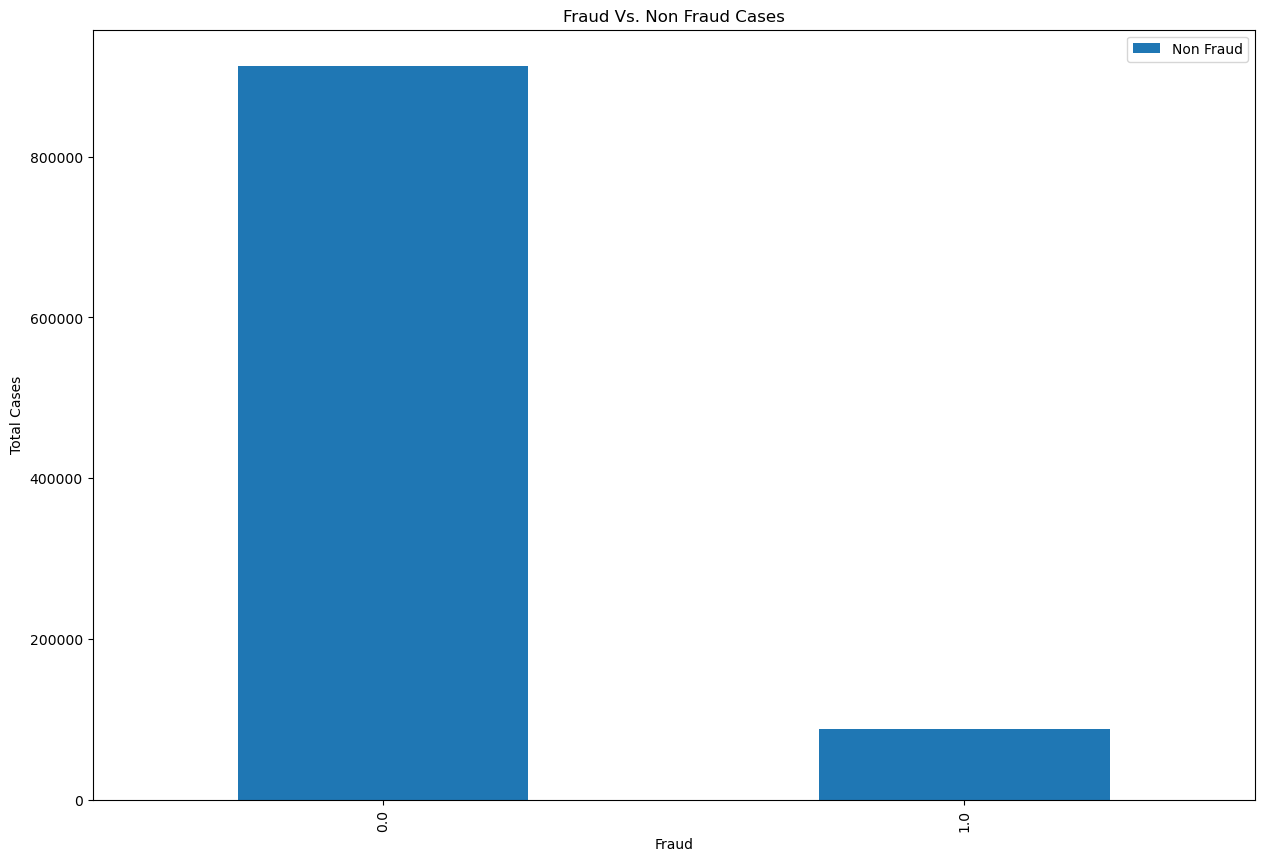

In [5]:
df['fraud'].value_counts().plot(kind = 'bar')
plt.title("Fraud Vs. Non Fraud Cases")
plt.xlabel("Fraud")
plt.ylabel("Total Cases")
plt.legend(['Non Fraud', 'Fraud'])
plt.show()

In [6]:
X = df.drop(['fraud'], axis = 1)
y = df['fraud'].values.reshape(-1, 1)

In [7]:
print("The shape of the input data: {}".format(X.shape))
print("The shape of the output data: {}".format(y.shape))

The shape of the input data: (1000000, 7)
The shape of the output data: (1000000, 1)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101,
                                                   stratify = y)

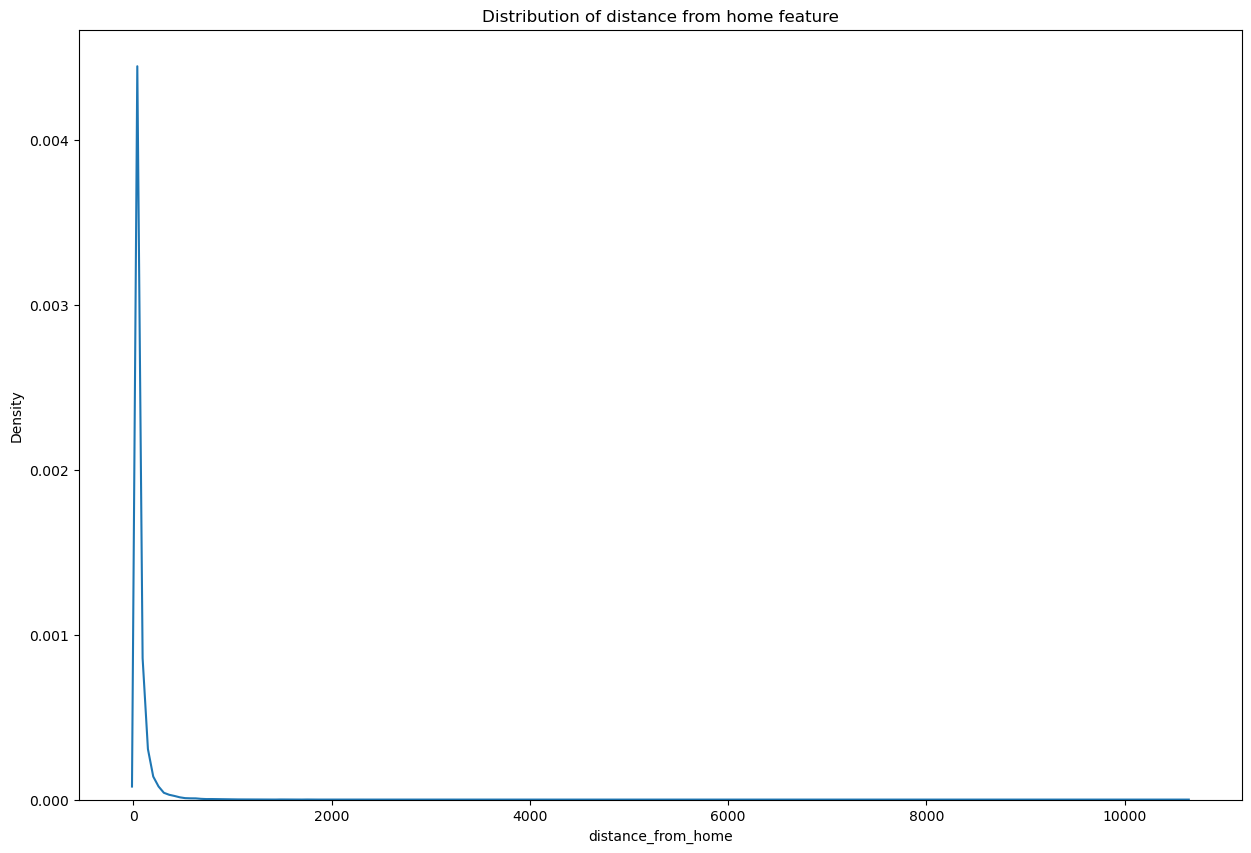

In [9]:
sns.kdeplot(X_train['distance_from_home'])
plt.title("Distribution of distance from home feature")
plt.show()

In [10]:
fraud_cases = df[df['fraud'] == 1]
non_fraud_cases = df[df['fraud'] == 0]

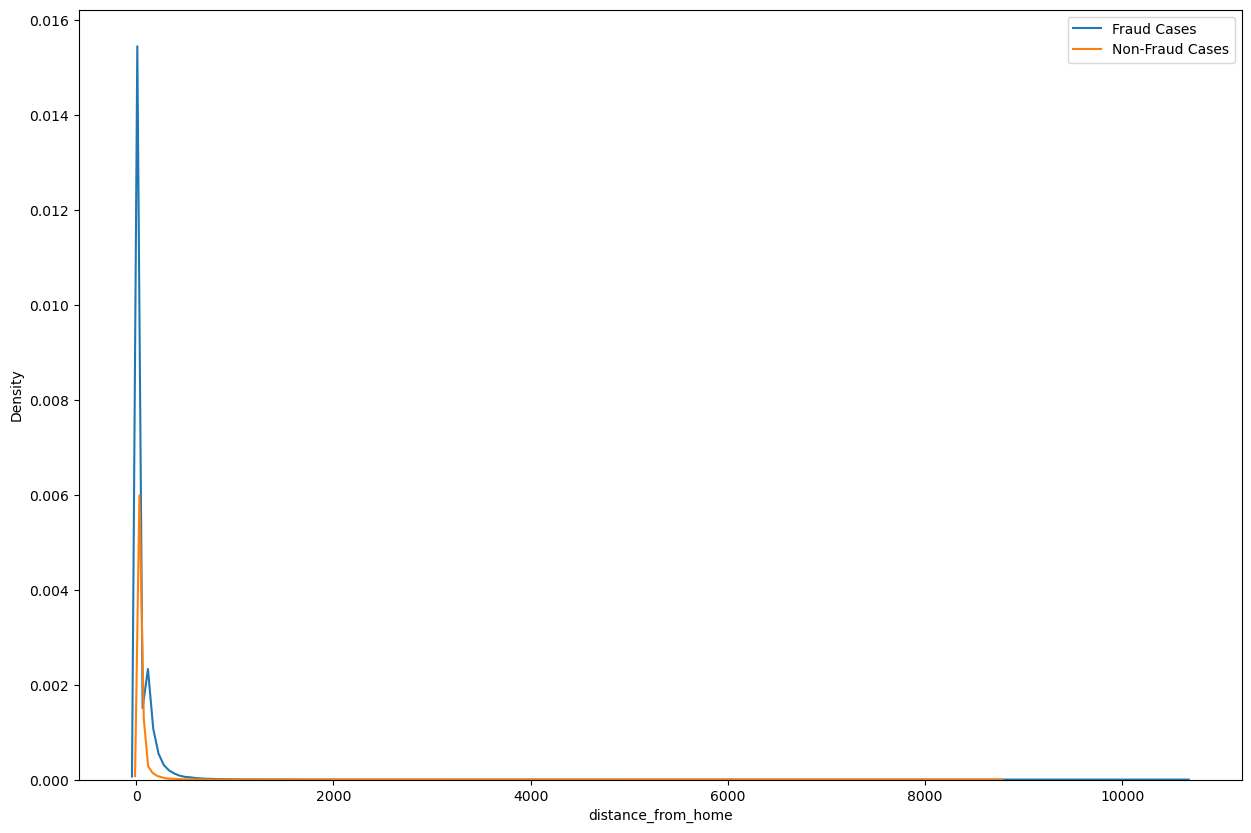

In [11]:
sns.kdeplot(fraud_cases['distance_from_home'], label = "Fraud Cases")
sns.kdeplot(non_fraud_cases['distance_from_home'], label = "Non-Fraud Cases")
plt.legend()
plt.show()

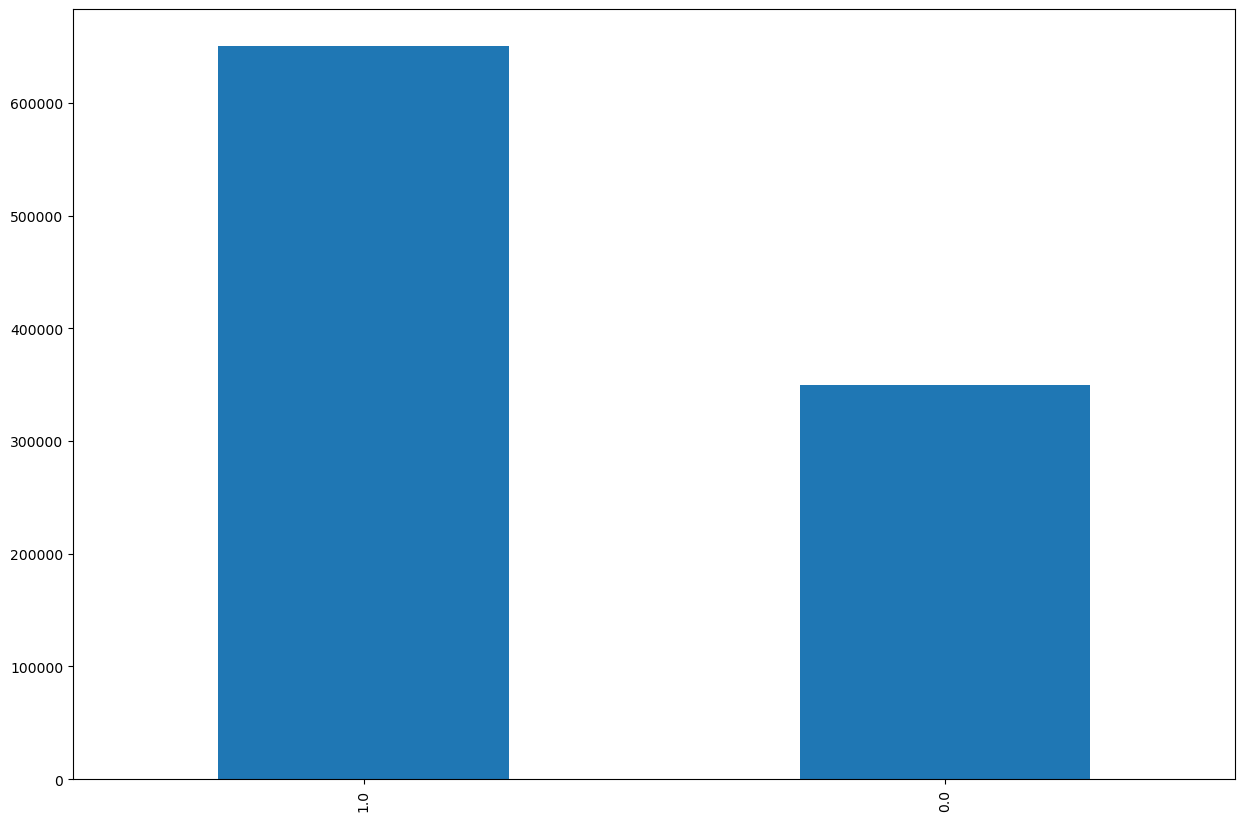

In [12]:
df['online_order'].value_counts().plot(kind = 'bar')
plt.show()

<AxesSubplot: >

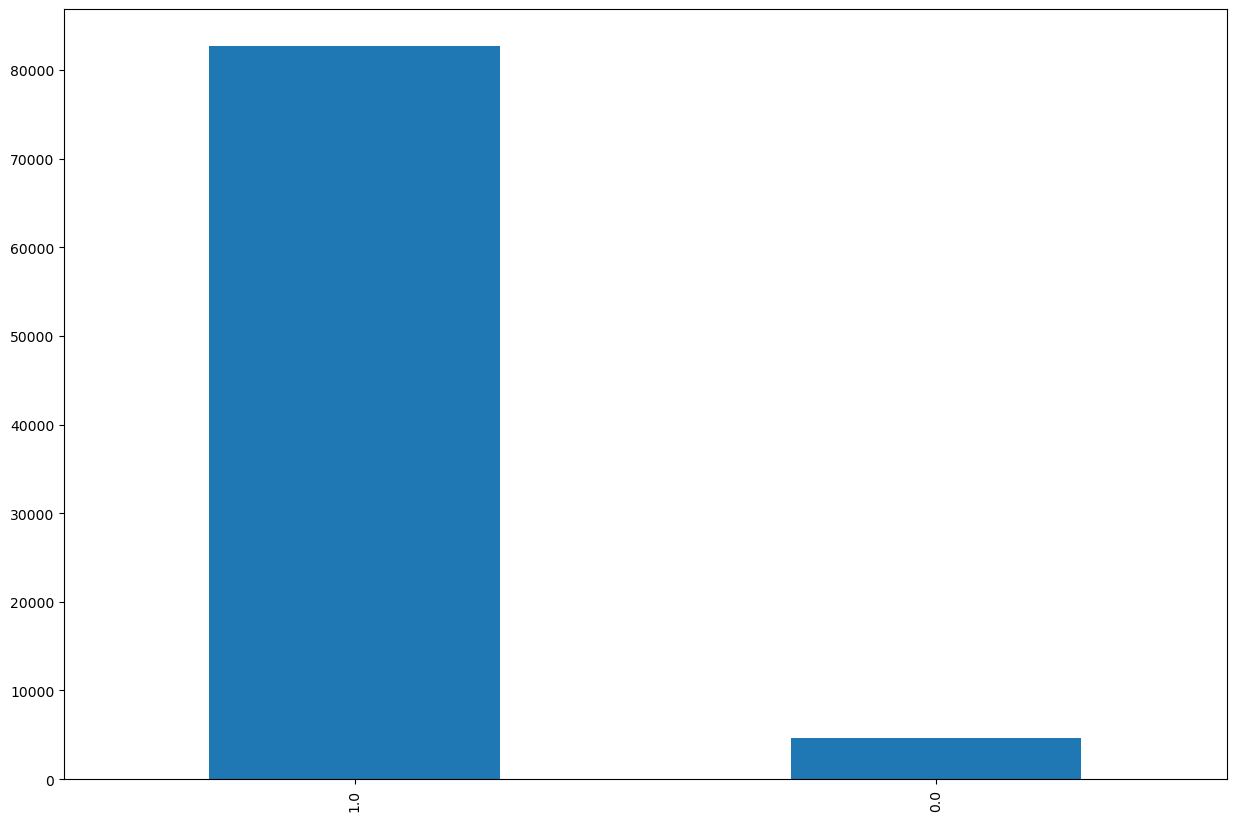

In [13]:
fraud_cases['online_order'].value_counts().plot(kind = 'bar')

<AxesSubplot: >

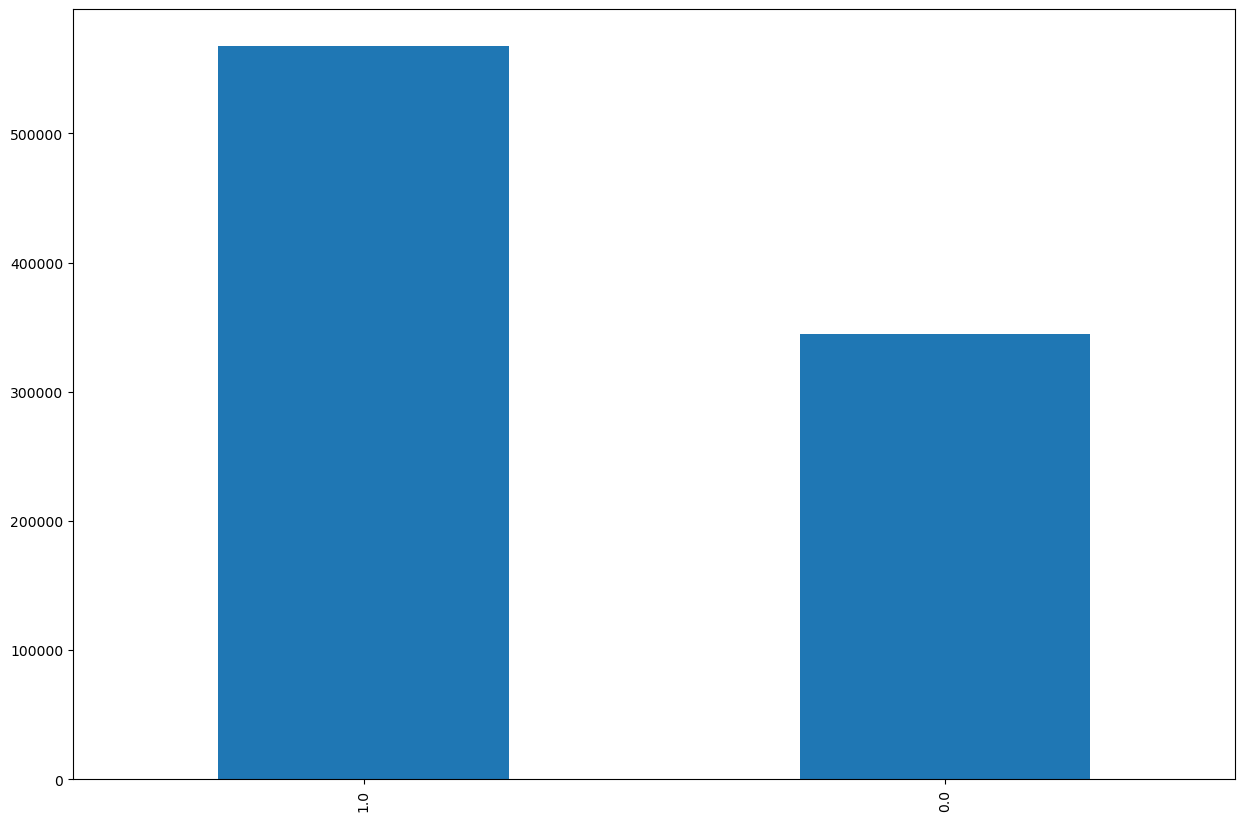

In [14]:
non_fraud_cases['online_order'].value_counts().plot(kind = 'bar')

<AxesSubplot: >

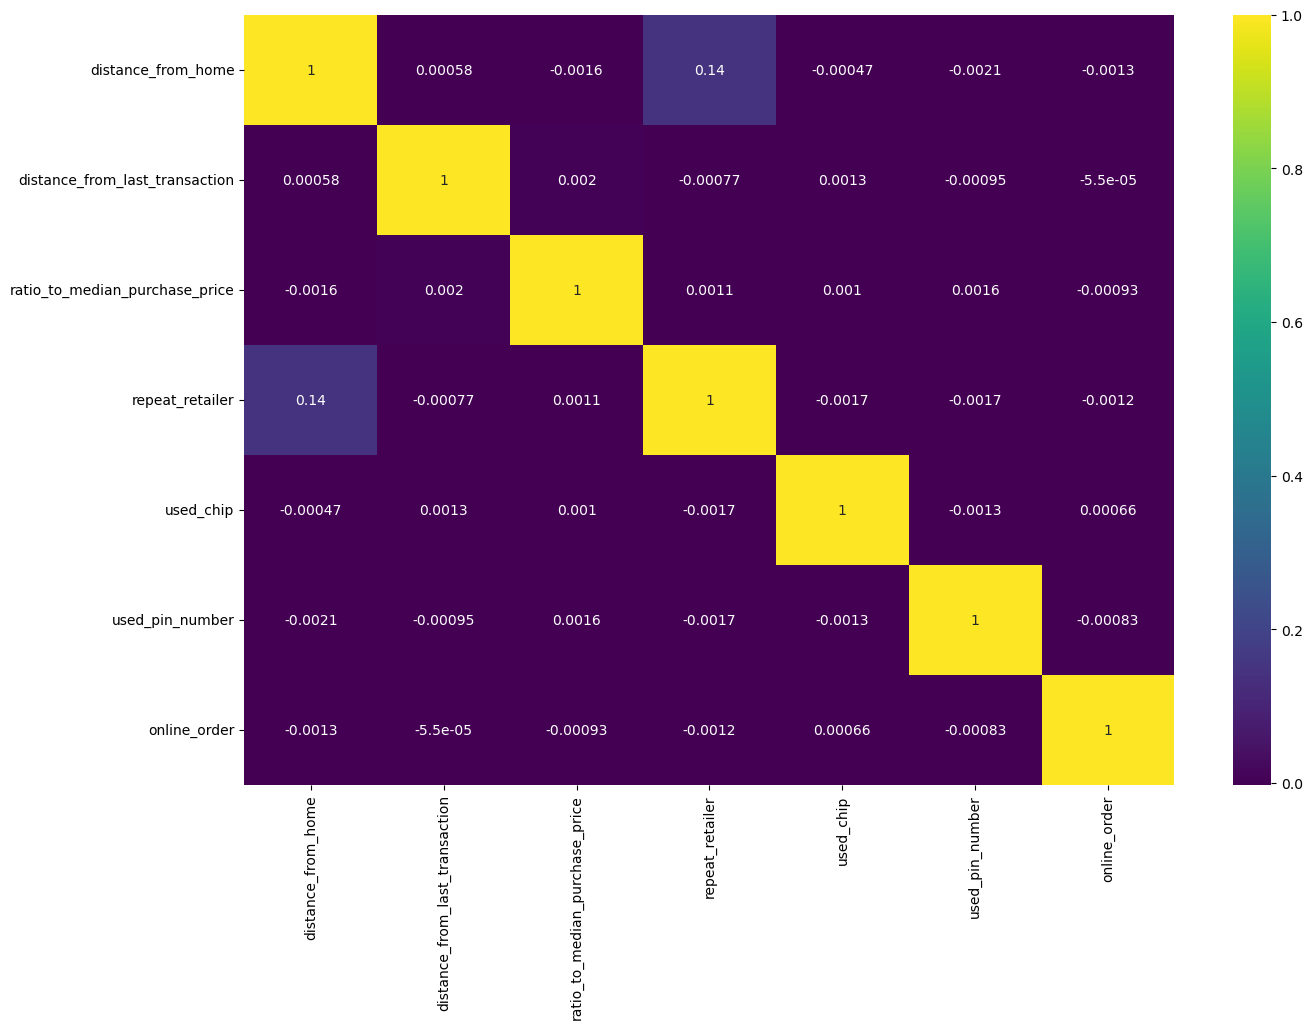

In [15]:
sns.heatmap(X_train.corr(), annot = True, cmap = 'viridis')

In [17]:
X_train.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
74182,7.000075,16.595474,0.664250,1.0,0.0,0.0,1.0
196318,1.477599,0.071672,2.424212,0.0,1.0,0.0,0.0
925685,4.515377,1.795108,0.116781,1.0,0.0,0.0,1.0
728002,10.586309,0.229630,3.049301,1.0,0.0,1.0,1.0
875280,17.360498,0.088579,0.267554,1.0,0.0,0.0,0.0


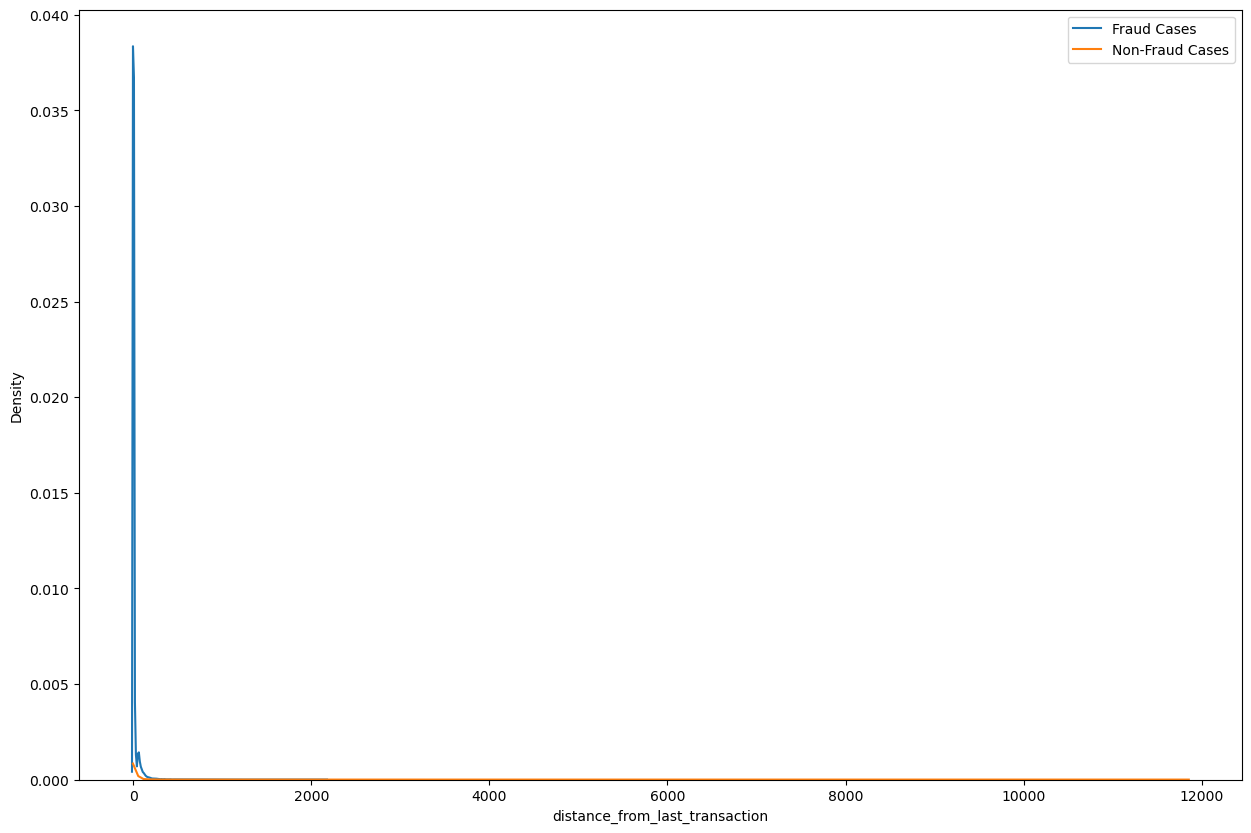

In [18]:
sns.kdeplot(fraud_cases['distance_from_last_transaction'], label = "Fraud Cases")
sns.kdeplot(non_fraud_cases['distance_from_last_transaction'], label = "Non-Fraud Cases")
plt.legend()
plt.show()

### Training an ML Model

In [20]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'xgboost'